## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

"wget" non è riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [33]:
import pandas as pd
import numpy as np

#1

N=10100
data=pd.read_csv('data_000637.txt',nrows=N)
data.head(150)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


In [34]:
# 2


x=max(data['BX_COUNTER']) #after this value the ORBIT_CNT is increased
print(x)


3563


In [49]:
rn=np.random.randint(0,1+1,10)
print(rn)

[0 0 1 1 1 0 1 1 1 1]


In [35]:
# 3

time=np.array(data['ORBIT_CNT']*x*25+data['BX_COUNTER']*25+data['TDC_MEAS']*25/30)*1e-9
tot_time=time[data.index[-1]]-time[0]
print('Total reading time of extracted data= '+str(tot_time)+' ns')


########### TOTAL DATA
data1=pd.read_csv('data_000637.txt')
#last=data.index[-1]
time_T=np.array(data1['ORBIT_CNT']*x*25+data1['BX_COUNTER']*25+data1['TDC_MEAS']*25/30)*1e-9
TOTAL_TIME=time_T[data1.index[-1]]-time_T[0]
print('Total reading time of total data= '+str(TOTAL_TIME)+' ns')


Total reading time of extracted data= 0.008970051596406847 ns
Total reading time of total data= 0.9801409933133982 ns


In [36]:
# 4

data1['Time ']=time_T
#data1

In [52]:
# 5
rand_01=np.random.randint(0,1+1,len(data1))
data1['HEAD']=rand_01
#data1

In [54]:
# 6

data_H1=data1[data1['HEAD']==1]
#data_H1

C:\Users\aless\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Legend does not support 'F' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  from ipykernel import kernelapp as app
C:\Users\aless\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Legend does not support 'P' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  from ipykernel import kernelapp as app
C:\Users\aless\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Legend does not support 'G' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  from ipykernel import kernelapp as app
C:\Users\aless\Anaconda3\lib\site-

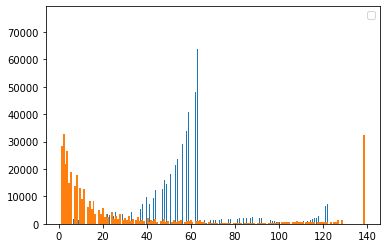

In [73]:
# 7
import matplotlib.pyplot as plt


#FPGA0 = data1[data1['FPGA']==0]#['TDC_CHANNEL'] 
#FPGA1 = data1[data1['FPGA']==1]

#ch_fpga0=FPGA0['TDC_CHANNEL']
#ch_fpga1=FPGA1['TDC_CHANNEL']
ch_fpga0=data1[data1['FPGA']==0]['TDC_CHANNEL'] 
ch_fpga1=data1[data1['FPGA']==1]['TDC_CHANNEL'] 

plt.hist(ch_fpga0, bins='auto')
plt.hist(ch_fpga1, bins='auto')
plt.legend('FPGA 0','FPGA 1')
plt.show()
#print(t)

In [85]:
# 8

count=data1.groupby('TDC_CHANNEL').count()['FPGA']
count.nlargest(3)


TDC_CHANNEL
139    108059
64      66020
63      64642
Name: FPGA, dtype: int64

In [95]:
# 9

unique_orbs=np.unique(data1['ORBIT_CNT'])
print('Unique orbits are '+str(len(unique_orbs))+' and are: '+str(unique_orbs))

###### unique orbits in channel 139
unique_orbs139=np.unique(data1[data1['TDC_CHANNEL']==139]['ORBIT_CNT'])
print('Unique orbits in channel 139 are '+str(len(unique_orbs139))+' and are: '+str(unique_orbs139))

Unique orbits are 11001 and are: [3869200167 3869200168 3869200169 ... 3869211169 3869211170 3869211171]
Unique orbits in channel 139 are 10976 and are: [3869200167 3869200168 3869200169 ... 3869211169 3869211170 3869211171]
